<a href="https://colab.research.google.com/github/vberestyukova/Data-analysis-and-machine-learning/blob/main/Genetic_Berestyukova_VM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pprint
import random
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_excel("homework.xlsx", sheet_name="Лист10")

In [ ]:
n=df.shape[0]
a=[]
a.append(df.X[0])
a.append(df.Y[0])

[[30, 40], [37, 52], [49, 49], [52, 64], [31, 62], [52, 33], [42, 41], [52, 41], [57, 58], [62, 42], [42, 57], [27, 68], [43, 67], [58, 48], [58, 27], [37, 69]]


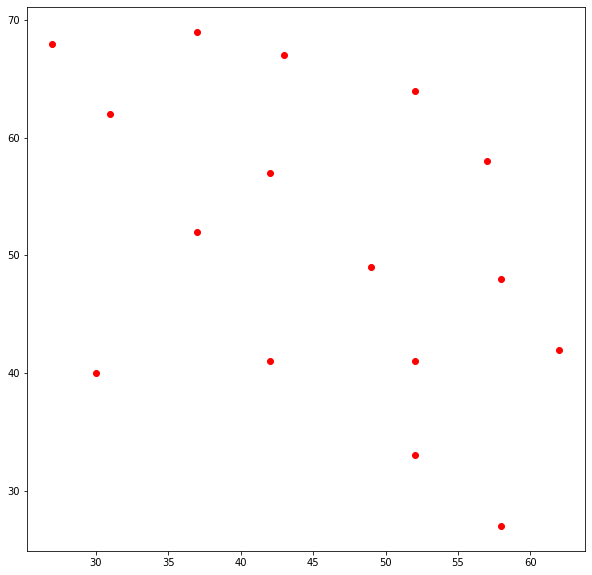

In [ ]:
coords=[]
x=df.X
y=df.Y
for i in range(n):
  cor=[]
  cor.append(df.X[i])
  cor.append(df.Y[i])
  coords.append(cor)
print(coords)
plt.figure(figsize=(10, 10))
plt.plot(x,y,'ro')
plt.show()


In [ ]:
demands = df.D
k=int(df.K[0])
capacity=int(df.C[0])
capacity

35

In [ ]:
# step 1, generate matrix of distances

distances_matrix = [[0 for _ in range(len(coords))] for _ in range(len(coords))]
for i in range(len(coords)):
	for j in range(i + 1, len(coords)):
		a = coords[i]
		b = coords[j]
		distance = math.sqrt((a[0] - b[0])**2 + (a[1] - b[1])**2)
		distances_matrix[i][j] = distances_matrix[j][i] = distance

# step 2, create initial population

population = []
for p_num in range(1000):
	routes = [[0] for _ in range(k)]
	points = list(range(1, len(coords)))
	vehicles_capacities = [capacity for _ in range(k)]
	random.shuffle(points)
	prev_points = None
	while points:
		if prev_points == points:
			routes = [[0] for _ in range(k)]
			points = list(range(1, len(coords)))
			vehicles_capacities = [capacity for _ in range(k)]
			random.shuffle(points)
			prev_points = None
		for i in range(k):
			if points:
				prev_points = points.copy()
				for j, point_candidate in enumerate(points):
					if vehicles_capacities[i] >= demands[point_candidate]:
						routes[i].append(point_candidate)
						points.pop(j)
						vehicles_capacities[i] -= demands[point_candidate]
						break
	population.append(routes)

def flatten(t):
    return [item for sublist in t for item in sublist]


def get_merged_parents(copied_population):
	hybrided_population = []

	for routes_id, routes in enumerate(copied_population[:-1]):

		if [len(r) for r in copied_population[routes_id]] == [len(r) for r in copied_population[routes_id - 1]]:
			hybrided_routes = []

			merged_parents = []

			flatten_parent1 = flatten(copied_population[routes_id])
			flatten_parent2 = flatten(copied_population[routes_id - 1])

			# merge parents genes
			for point1, point2 in zip(flatten_parent1, flatten_parent2):
				if point1 not in merged_parents:
					merged_parents.append(point1)
				if point2 not in merged_parents:
					merged_parents.append(point2)

			merged_parents = merged_parents[1:]

			# make child with parents genes
			for i in range(len(routes)):
				hybrided_routes.append([0])
				for point in routes[i][1:]:
					new_point = merged_parents[0]
					merged_parents = merged_parents[1:]
					hybrided_routes[i].append(new_point)

			# check if child corresponds requirements
			for route in hybrided_routes:
				if sum([demands[point] for point in route]) > capacity:
					break
			else:
				hybrided_population.append(hybrided_routes)

	return hybrided_population


def get_mutated_item(copied_population):
	mutated_population = []

	for routes_id, routes in enumerate(copied_population[:-1]):
		k_i = random.randint(1, k - 1)
		k_j = random.randint(1, k - 1)
		i_route = routes[k_i]
		j_route = routes[k_j]
		a = random.randint(1, len(i_route) - 1)
		b = random.randint(1, len(j_route) - 1)

		# metate random genes
		i_route[a], j_route[b] = j_route[b], i_route[a]

		# check if mutated item corresponds requirements
		for route in routes:
			if sum([demands[point] for point in route]) > capacity:
				break
		else:
			mutated_population.append(routes)

	return mutated_population

# step 3, parents merge
for _ in range(500):
	mutated_population = []
	hybrided_population = []
	copied_population = copy.deepcopy(population)

	# скрещивание
	hybrided_population = get_merged_parents(copied_population)
	# мутация
	mutated_population = get_mutated_item(copied_population)

	population.extend(hybrided_population)
	population.extend(mutated_population)

	real_distances = []
	for j, routes in enumerate(population):
		total_distance = 0
		for route in routes:
			for i in range(len(route)):
				total_distance += distances_matrix[route[i-1]][route[i]]
		real_distances.append((j, total_distance))

	sorted_distances = sorted(real_distances, key=lambda x: x[1])
	selected_items = [i[0] for i in sorted_distances[:1000]]

	selected_population = []
	for i, popul in enumerate(population):
		if i in selected_items:
			selected_population.append(popul)
	population = selected_population

pprint.pprint(population[0])

best_population = population[0]





[[0, 14, 5],
 [0, 9, 7],
 [0, 2],
 [0, 15, 12, 10],
 [0, 8, 13],
 [0, 6],
 [0, 4, 11],
 [0, 1, 3]]


In [ ]:
sorted_distances[0]

(0, 454.3983428045983)

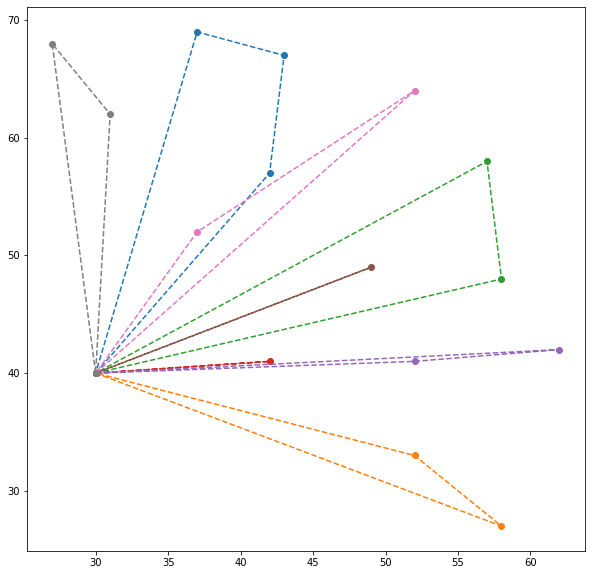

In [ ]:
plt.figure(figsize=(10, 10))
def graph(a):
  x=[]
  y=[]
  for i in range(len(a)):
    x.append(coords[a[i]][0])
    y.append(coords[a[i]][1])
  x.append(coords[a[0]][0])
  y.append(coords[a[0]][1])
  plt.plot(x,y,'o--')
  
for route in best_population:
  graph(route)

plt.show()

*   A-n32-k5: genetic: 976; opt: 784
*   A-n39-k5: genetic: 1016; opt: 822
*   E-n22-k4: genetic: 400; opt: 375
*   F-n45-k4: genetic: 1060; opt=724
*   P-n22-k8: genetic: 698; opt=603
*   Tai75b: genetic: 1491; opt=1344.62
*   P-n22-k2: genetic: 230; opt=216
*   B-n31-k5: genetic: 740; opt=672
*   CMT1: genetic: 679; opt=525
*   P-n16-k8: genetic: 451; opt=450










A-n32-k5

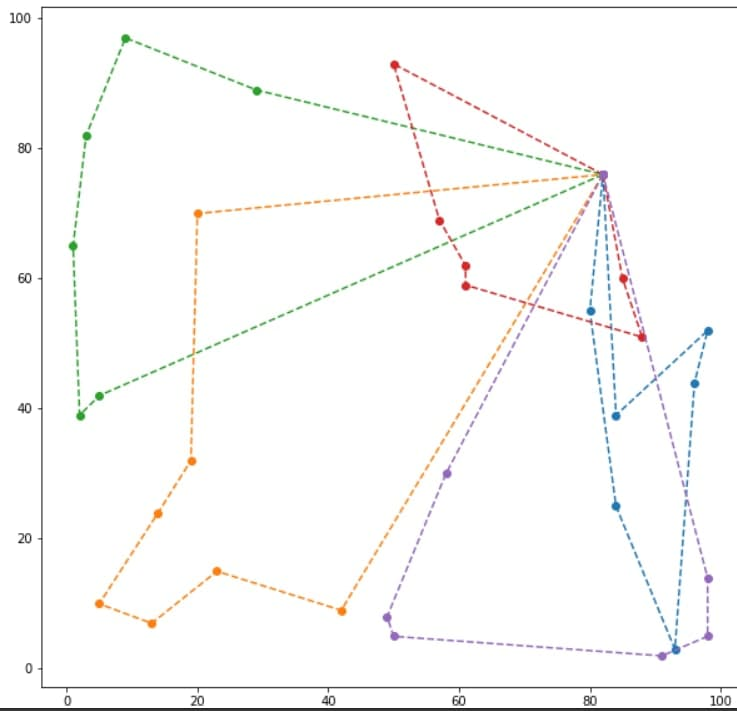

A-n39-k5

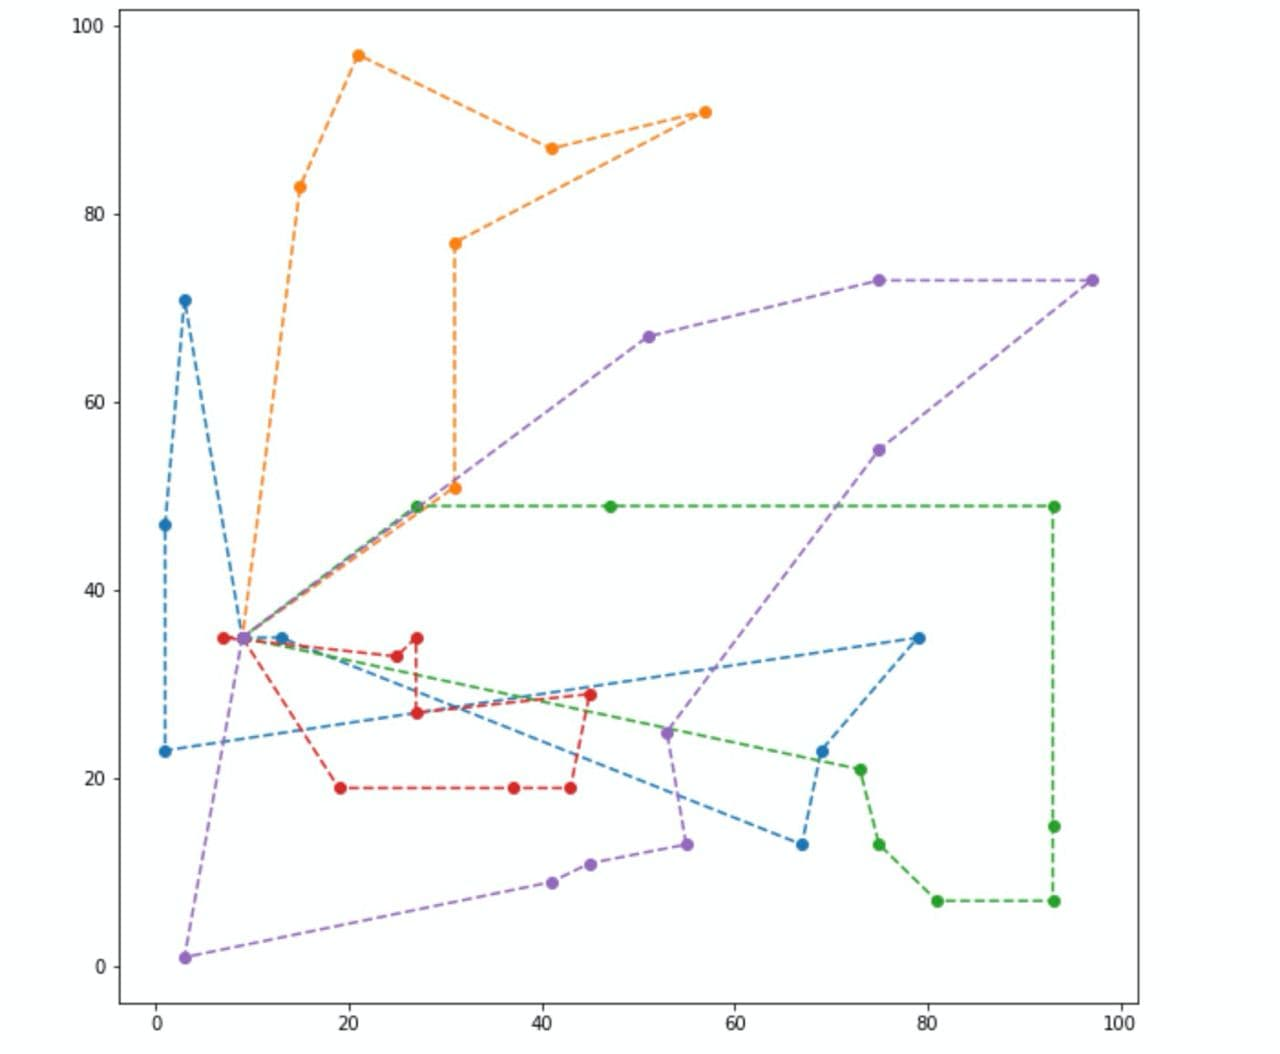

E-n22-k4
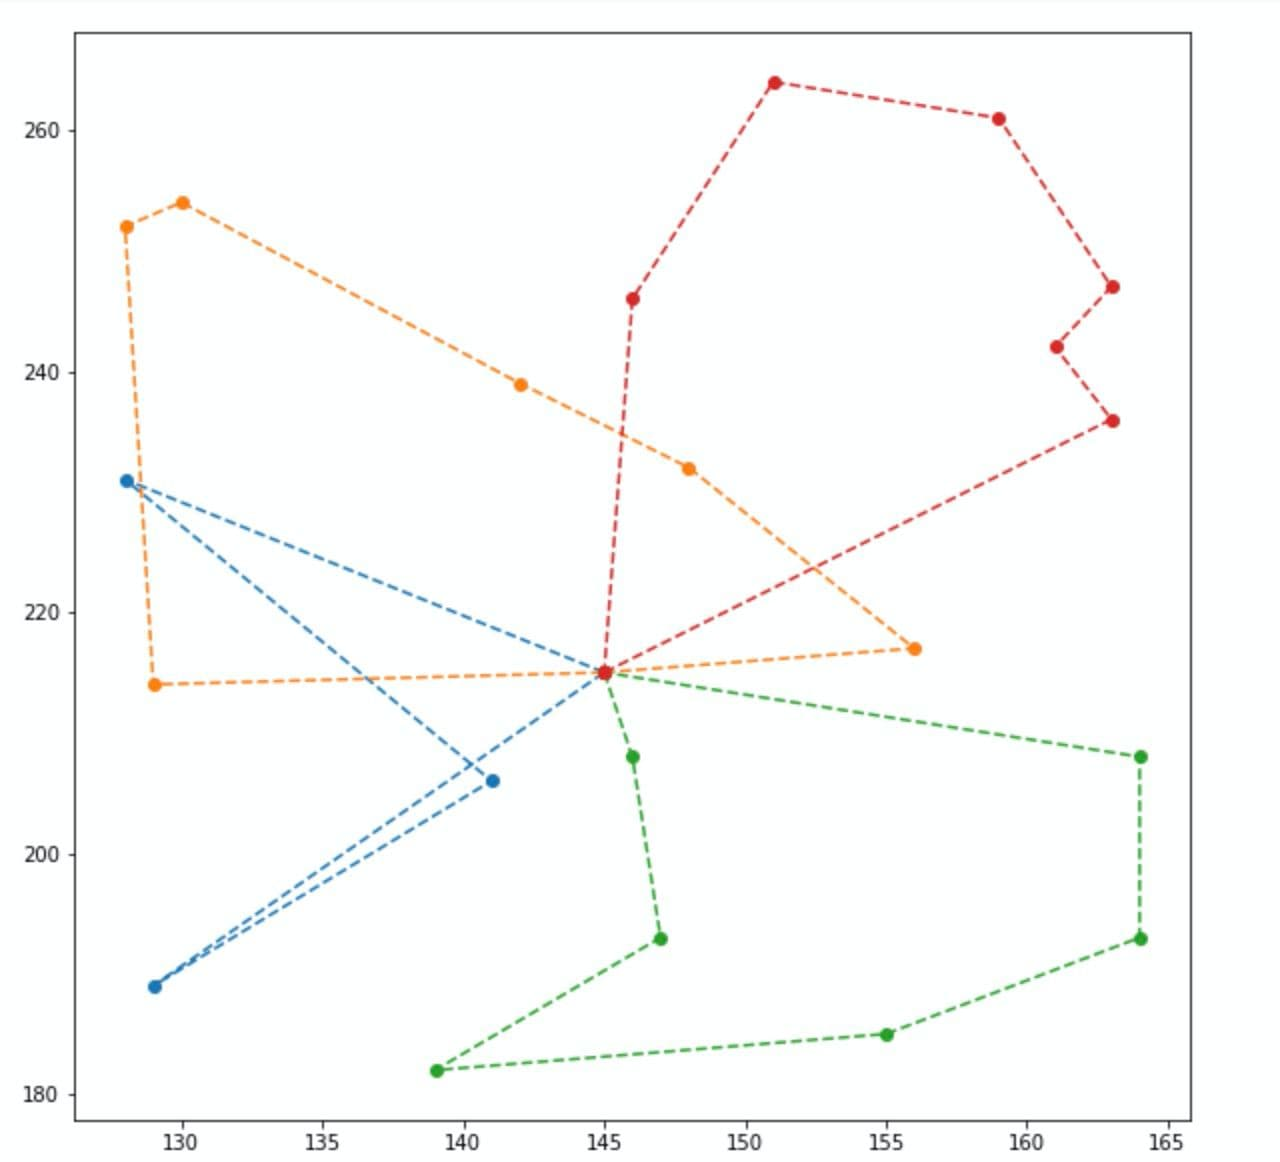

F-n45-k4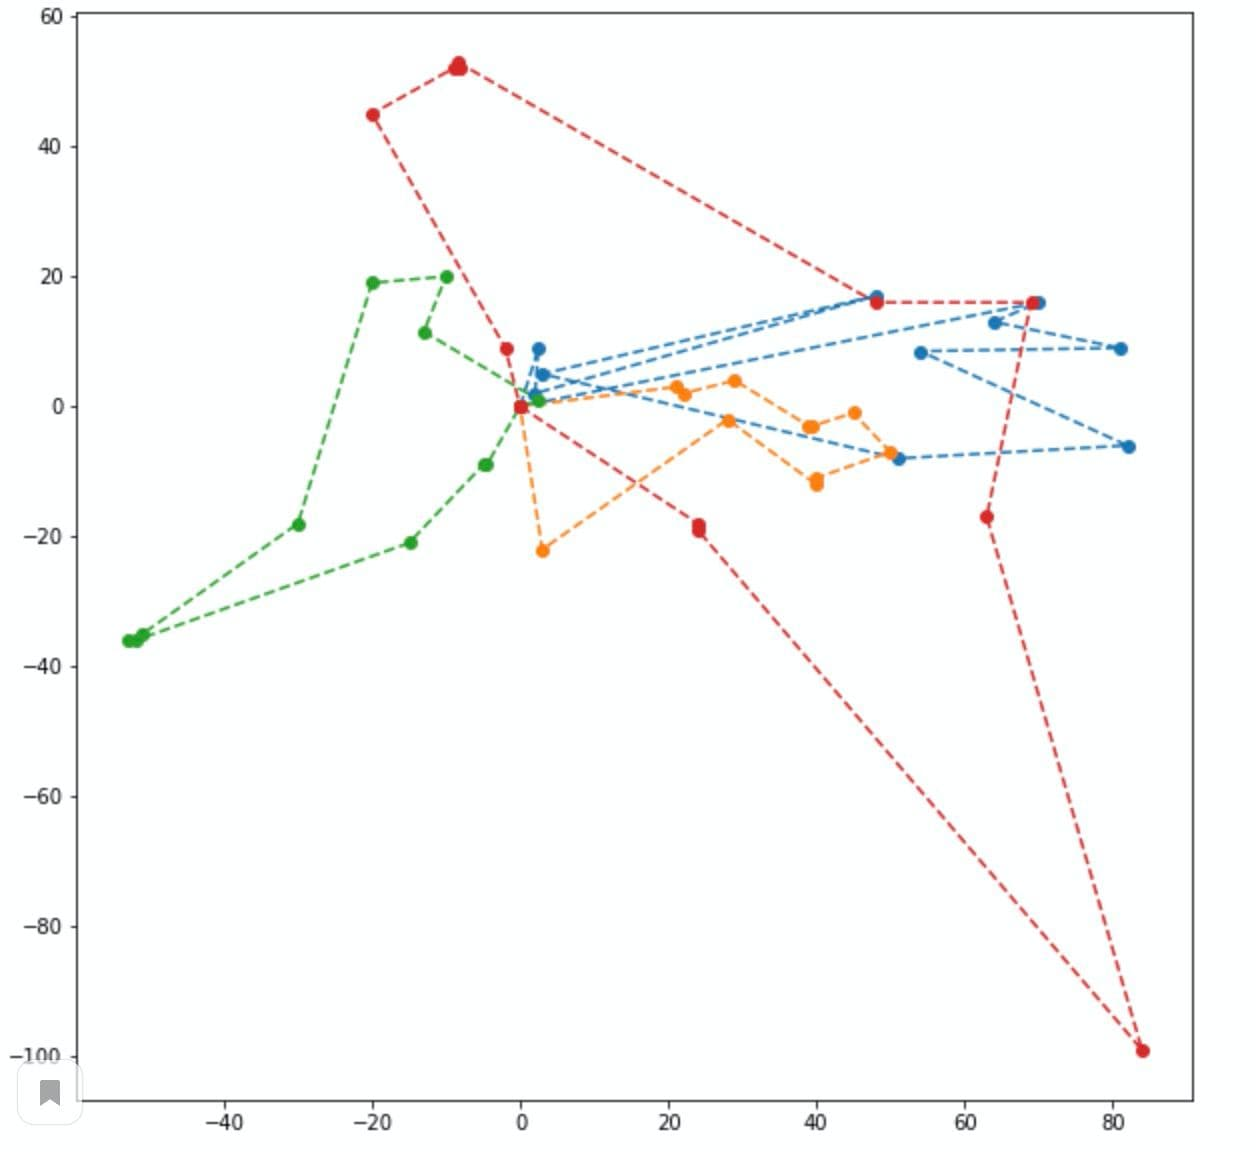

P-n22-k8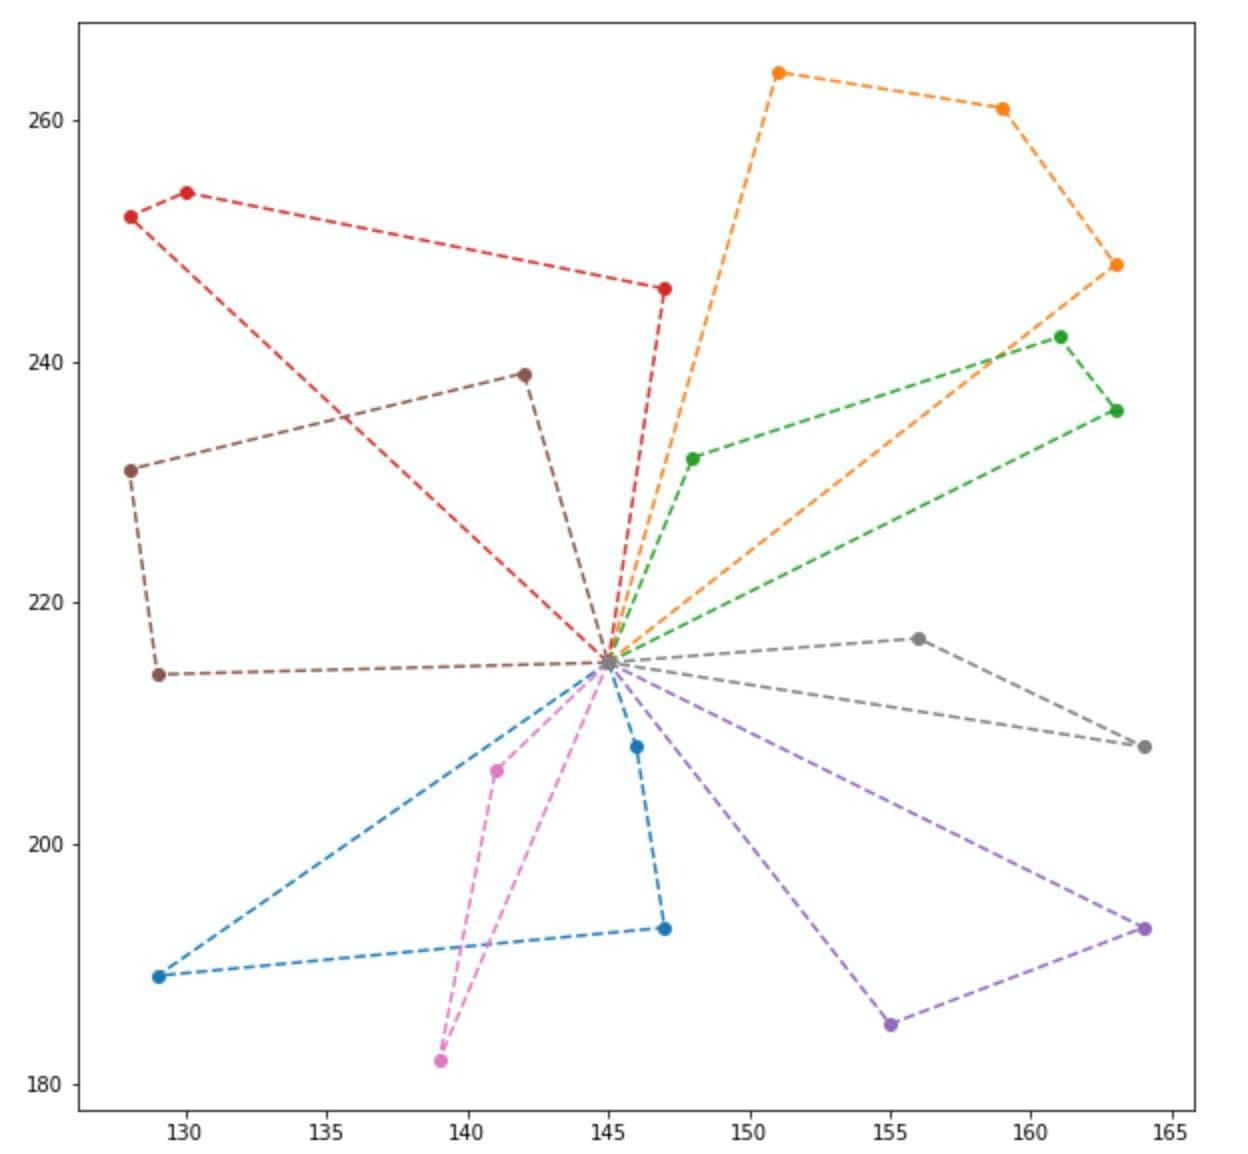

Tai75b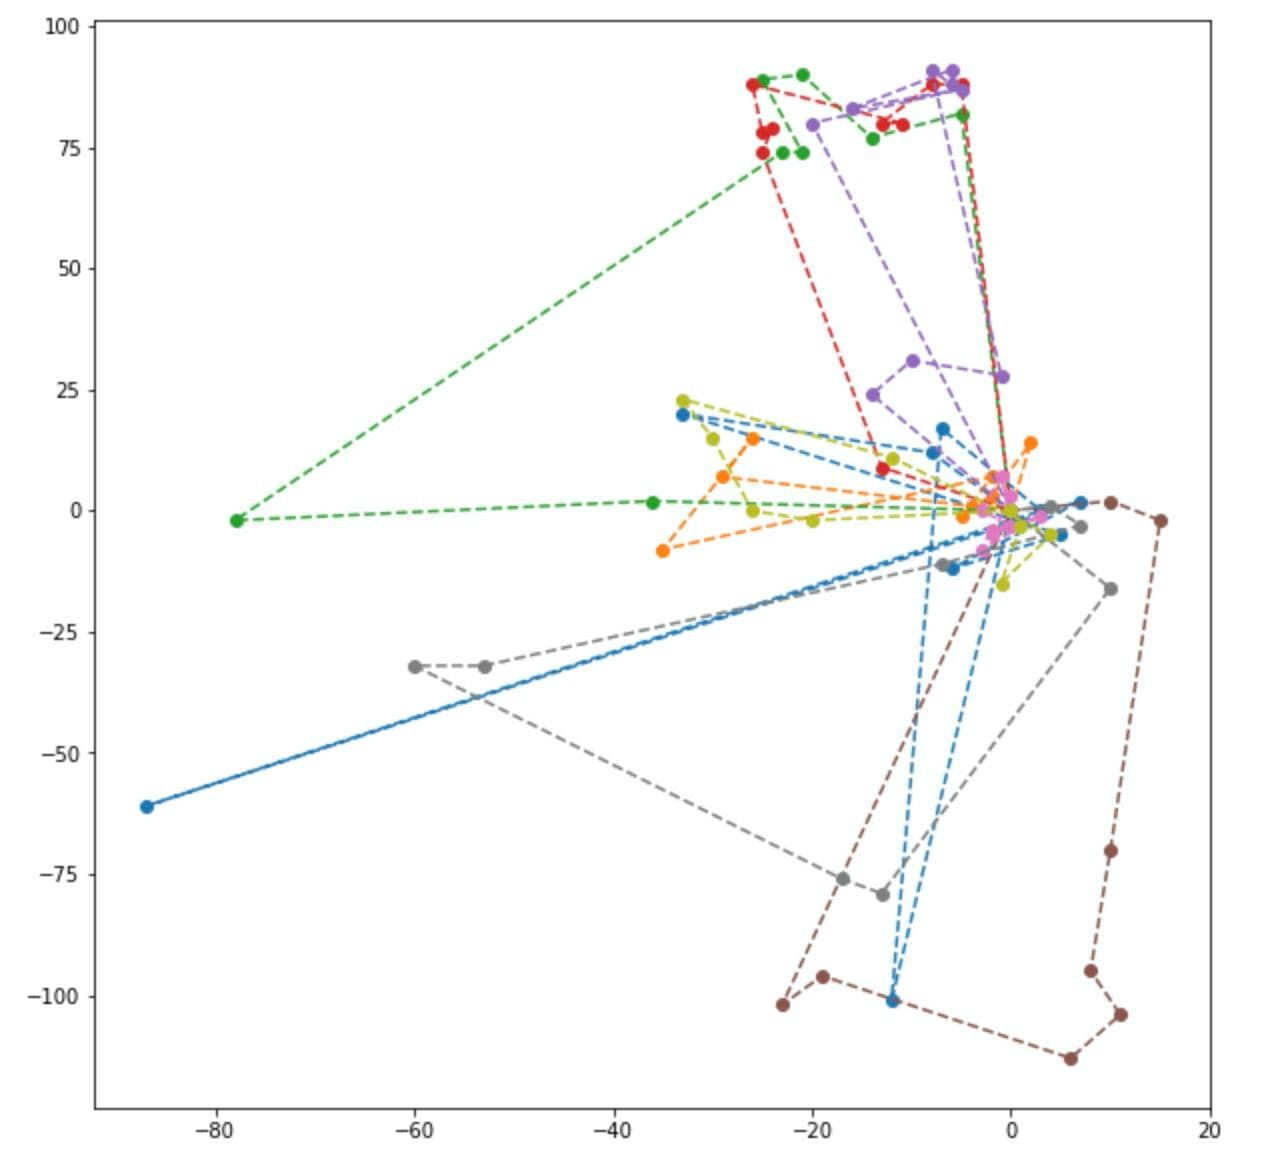

P-n22-k2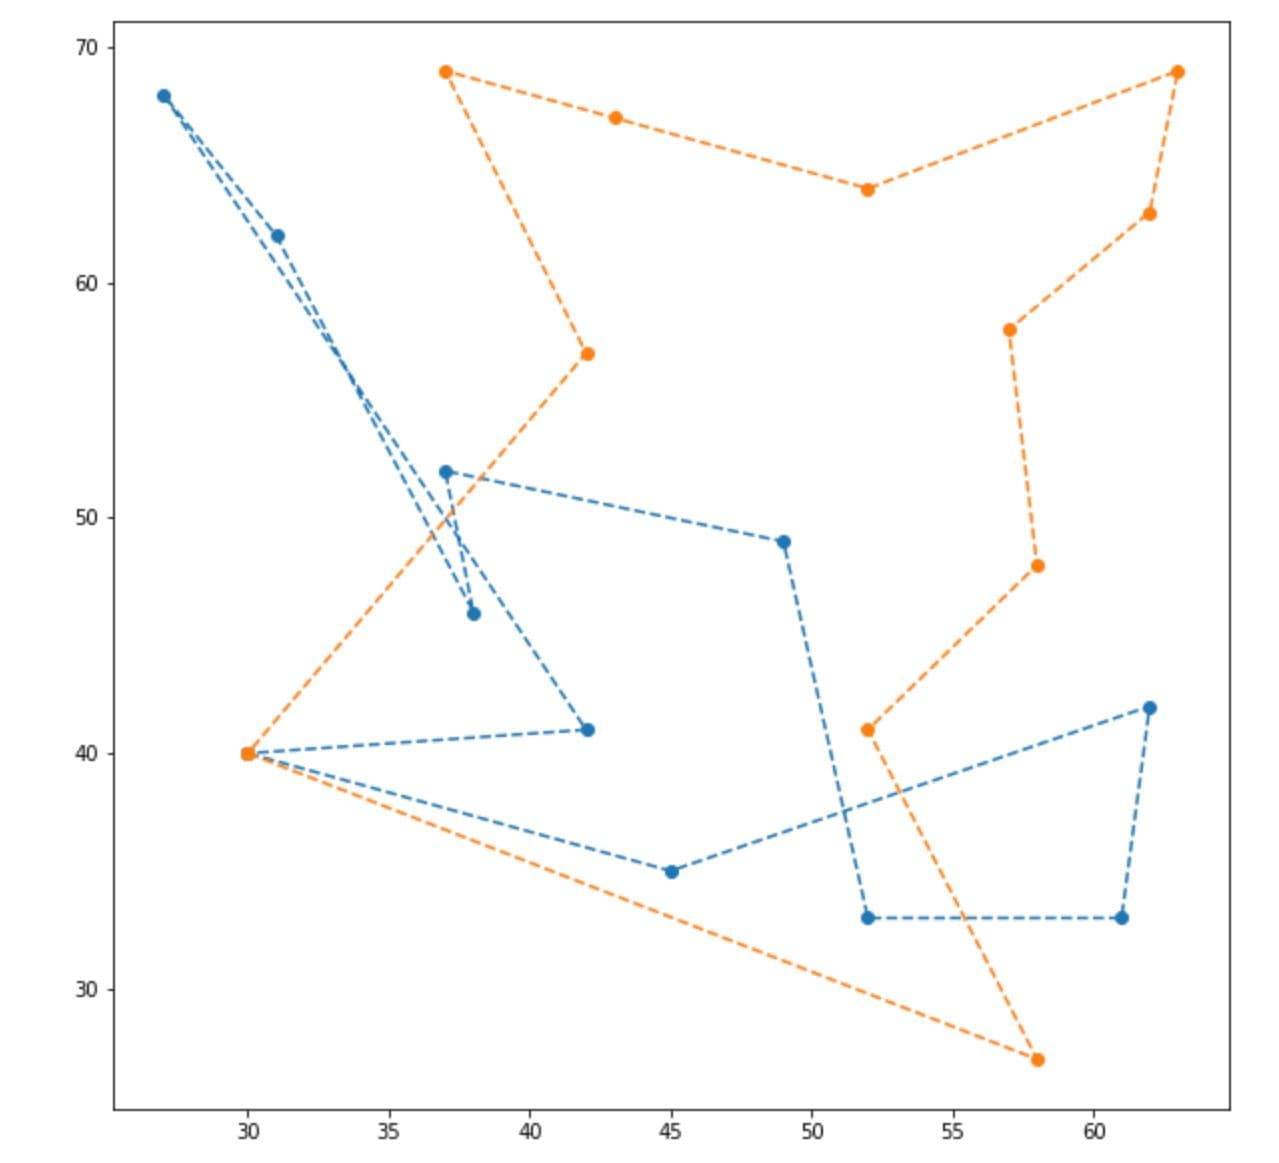

B-n31-k5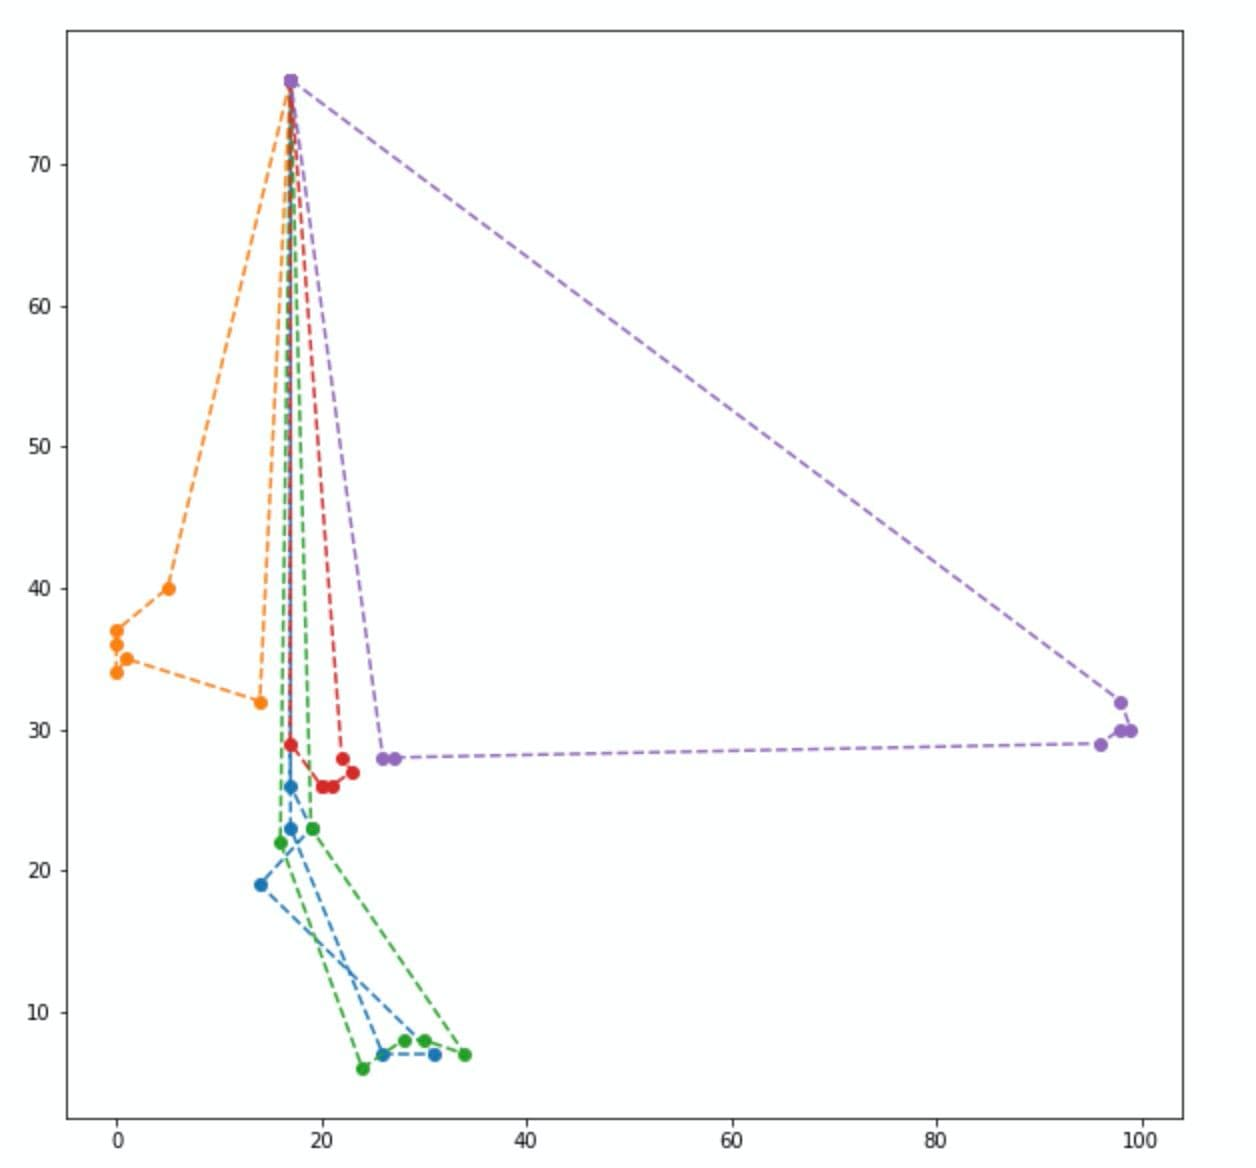

CMT1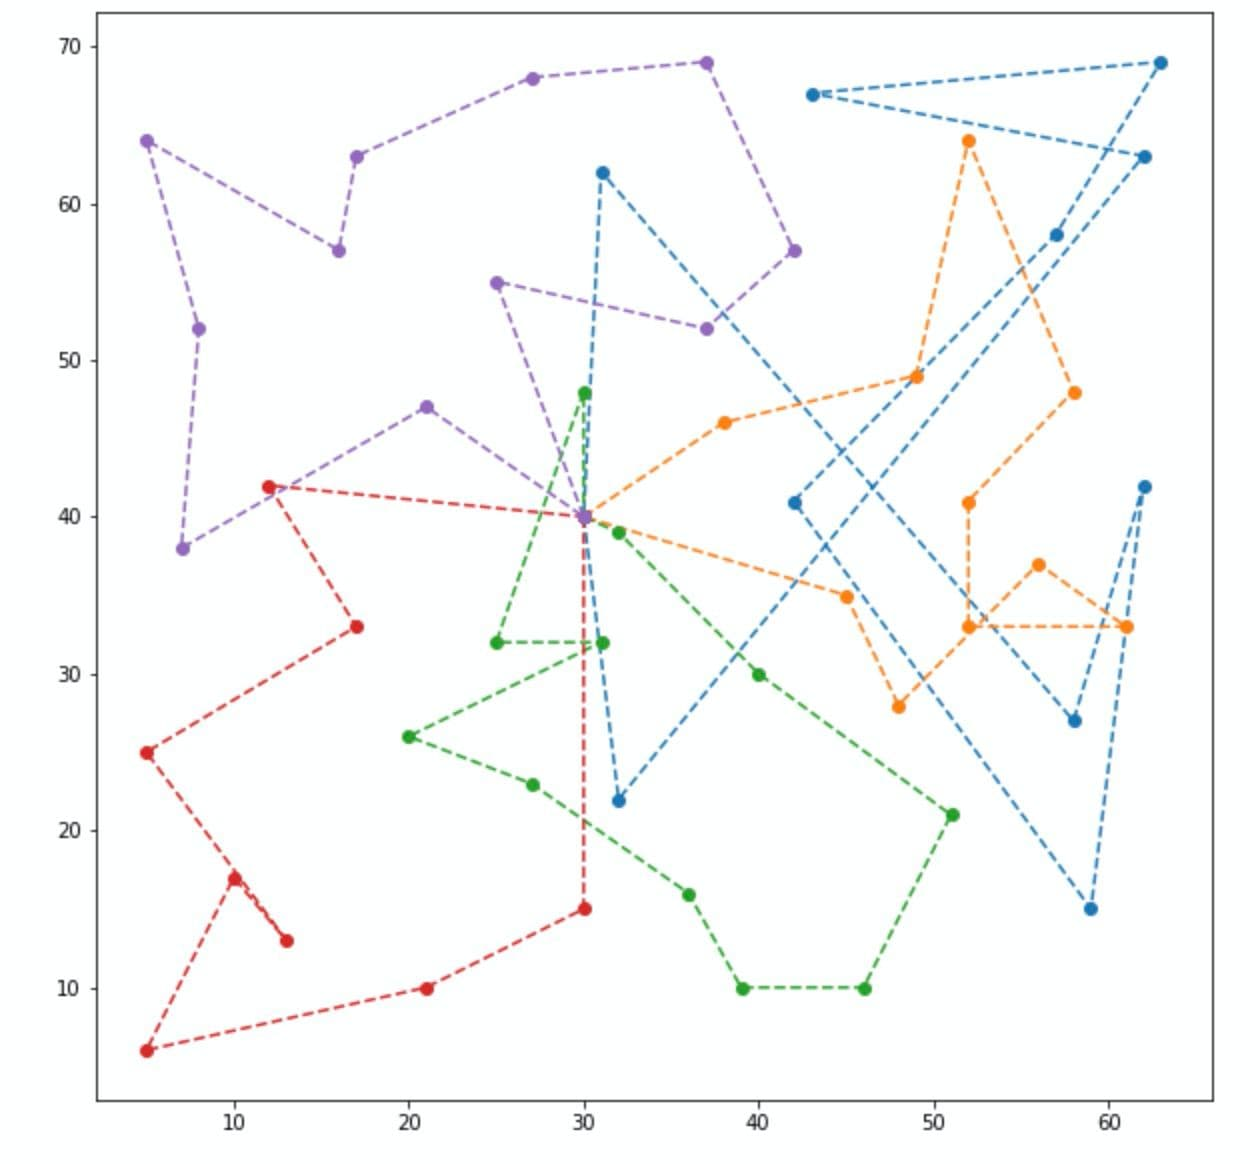